In [1]:
import numpy as np
import pandas as pd

In [2]:
p,f = "class.csv","zoo.csv"

In [3]:
data,classi = pd.read_csv(f),pd.read_csv(p)

In [6]:
y_verita = data['class_type'].to_numpy() ###questo è l'array verità in base al quale confrontare i vari risultati di clustering 
print(y_verita)


[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


# Preprocessing

In [9]:
X = data.drop(['animal_name']+['class_type'],axis=1)
###Eliminiamo dal dataframe i nomi degli animali che sono una variabile categorica e la classe di appartenenza che 
###vogliamo trovare con gli algoritmi di clustering

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
###come sappiamo applicando uno scaler otteniamo un oggetto numpy, perciò ricreiamo il dataframe utilizzando gli indici di colonna originali

In [12]:
Xs
###Come abbiamo visto il nostro dataset non contiene valori nulli e tutti gli attributi hanno valori booleani 1 o 0 
###a eccezione della colonna legs, perciò ho apllicato MinMaxScaler per scalare i valori in modo che anche legs 
###assuma valori tra 0 e 1.
###A questo punto i dati sono pronti per applicare gli algoritmi di clustering.

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


# Clustering

In [ ]:
###come funziona ciascuno di questi algoritmi?????

Kmeans

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters= 7,random_state=0)
### Random state è un parametro che ci serve per fare in modo che i centroidi di partenza siano determinati a partire 
### da un numero, e non generati casualmente in modo che ripetendo il clustering tutte le volte abbiamo lo stesso 
### risultato
y_pred_k = kmeans.fit_predict(Xs)

Agglomerative clustering

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
aggc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward' )
y_pred_aggc =aggc.fit_predict(Xs)
####Qui ha creato 9 cluster anzichè 7 (da rifare correggendo parametri)


SpectralClustering

In [72]:
from sklearn.cluster import SpectralClustering

In [73]:
spc = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0)
y_pred_spc = spc.fit_predict(Xs)

DBSCAN

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
dbscan =DBSCAN(eps=0.3,min_samples=4)
y_pred_dbscan = dbscan.fit_predict(Xv)#### Ho verificato che con Dbscan otteniamo un risultato molto migliore 
                                     ####  se usiamo il dataset in 2 dimensioni               

Birch

In [76]:
from sklearn.cluster import Birch

In [88]:
brc = Birch(n_clusters=7, threshold = 0.1)
y_pred_brc = brc.fit_predict(Xs)

# Results visualization

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [79]:
pca = PCA(2)
Xv = pca.fit_transform(Xs)
### Applichiamo la principal component analysis per comprimere i dati in due dimensioni e poterli visualizzare.

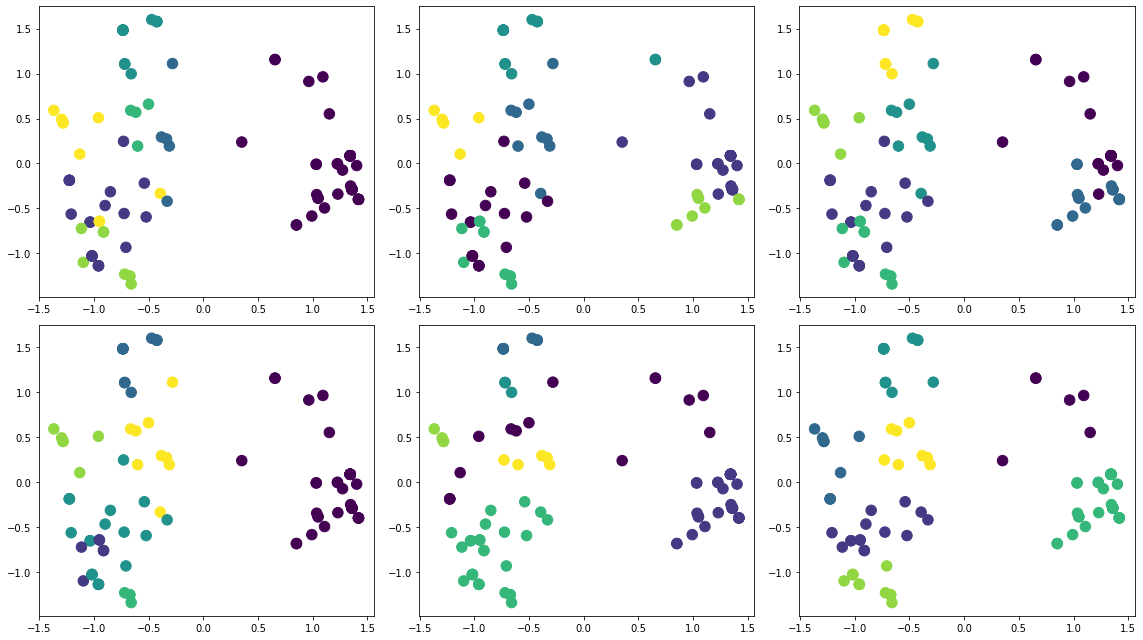

In [80]:
fig, ax = plt.subplots(figsize=(16,9),ncols=3, nrows=2)
ax[0][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_verita)###classificazione reale
ax[0][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_k)###classificazione kmeans
ax[0][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_aggc)
ax[1][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_spc)
ax[1][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_dbscan)
ax[1][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_brc)
plt.tight_layout()
plt.show()
### Visualizziamo i diversi risultati di clustering sulle coordinate dei nostri animali portate in 2 dimensioni.

# Benchmark e interpretazione

In [81]:
from sklearn.metrics import adjusted_rand_score, completeness_score
### Bisogna dare una piccola descrizione di cosa misurano queste due metriche e perchè sono state scelte

Utilizziamo due metriche diverse per verificare quanto il risultato ottenuto con gli algoritmi di clustering sia accurato rispetto alla ground truth.

Kmeans

In [82]:
risultati = {}
k_c= completeness_score(y_verita,y_pred_k)
k_a = adjusted_rand_score(y_verita,y_pred_k)
risultati['kmeans'] =[k_c,k_a]

AgglomerativeClustering

In [83]:
aggc_c= completeness_score(y_verita,y_pred_aggc)
aggc_a = adjusted_rand_score(y_verita,y_pred_aggc)
risultati['Agglomerative_clustering']=[aggc_c,aggc_a]

SpectralClustering

In [84]:
spc_c= completeness_score(y_verita,y_pred_spc)
spc_a = adjusted_rand_score(y_verita,y_pred_spc)
risultati['spectral_clustering']=[spc_c,spc_a]

DBSCAN

In [85]:
dbscan_c= completeness_score(y_verita,y_pred_dbscan)
dbscan_a = adjusted_rand_score(y_verita,y_pred_dbscan)
risultati['Dbscan']=[dbscan_c,dbscan_a]

Birch

In [89]:
brc_c= completeness_score(y_verita,y_pred_brc)
brc_a = adjusted_rand_score(y_verita,y_pred_brc)
risultati['Birch']=[brc_c,brc_a]

In [49]:
risultati
###perchè è il migliore???

{'kmeans': [0.7751030251507829, 0.6940118633468724],
 'Aggc': [0.7935737537548521, 0.6828773460462316],
 'spectral_clustering': [0.9037420936277645, 0.9475184399253236],
 'Birch': [0.8417081325549081, 0.8210050594486954],
 'Dbscan': [0.6714967974497269, 0.6242163665580235]}

L'algoritmo migliore si rivela essere lo spectral clustering